In [1]:
import tensorflow as tf
import matplotlib
import keras
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist # disponivel diretamento do tensoflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt

In [3]:
(x_treinamento, y_treinamento), (x_teste, y_teste) = mnist.load_data()

In [4]:
x_treinamento.shape, x_teste.shape # 60000 treinamento, 10000 teste, 28x28 pixels

((60000, 28, 28), (10000, 28, 28))

In [5]:
28*28 # 784 pixels

784

In [6]:
x_treinamento, x_treinamento.max() # 0 -> preto | 255 -> branco

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [7]:
y_treinamento # respostas

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.0, 'Classe 5')

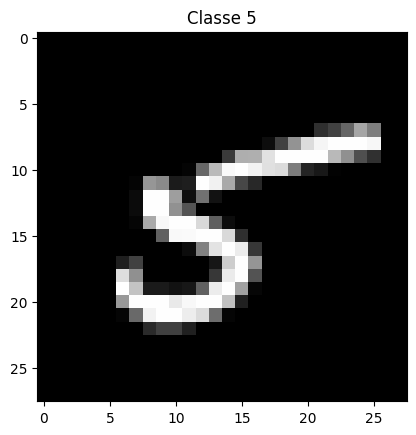

In [8]:
plt.imshow(x_treinamento[145], cmap='gray')
plt.title(f'Classe {str(y_treinamento[0])}')

In [9]:
x_treinamento.shape

(60000, 28, 28)

In [10]:
x_treinamento = x_treinamento.reshape(x_treinamento.shape[0], 28, 28, 1) # 1 = dimensao relacionada ao numero de canais

In [11]:
x_teste = x_teste.reshape(x_teste.shape[0], 28, 28, 1)

In [12]:
x_treinamento.shape, x_teste.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [13]:
x_treinamento = x_treinamento.astype('float32')

In [14]:
x_teste = x_teste.astype('float32')

In [15]:
x_treinamento /= 255 # normalizaca
x_teste /= 255

In [16]:
x_treinamento.max(), x_treinamento.min() # antes era 0 e 255 |z| 0 é preto e 1 é brando

(1.0, 0.0)

In [17]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_treinamento = np_utils.to_categorical(y_treinamento, 10) # 10 = numero de classes
y_teste = np_utils.to_categorical(y_teste, 10) # 10 = numero de classes
y_treinamento

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [19]:
y_treinamento[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### rede neural

In [20]:
rede_neural = Sequential([
    InputLayer(shape=(28, 28, 1)), # entrada (imagem)

    # bloco de camada 1
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'), # convolução
    BatchNormalization(), # normalização
    MaxPooling2D(pool_size=(2,2)), # pooling

    # bloco de camada 2
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'), # convolução
    BatchNormalization(), # normalização
    MaxPooling2D(pool_size=(2,2)), # pooling

    Flatten(), # transforma a matriz em um vetor

    # camada oculta 1
    Dense(units=128, activation='relu'), # camada oculta
    Dropout(0.2), # dropout

    # camada oculta 2
    Dense(units=128, activation='relu'), # camada oculta
    Dropout(0.2), # dropout

    # camada de saida
    Dense(units=10, activation='softmax')

])

In [21]:
rede_neural.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
rede_neural.fit(x_treinamento, y_treinamento,
                batch_size=128, epochs=5,
                validation_data=(x_teste, y_teste))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8690 - loss: 0.4600 - val_accuracy: 0.9718 - val_loss: 0.0927
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9762 - loss: 0.0829 - val_accuracy: 0.9791 - val_loss: 0.0588
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9856 - loss: 0.0490 - val_accuracy: 0.9833 - val_loss: 0.0510
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9896 - loss: 0.0339 - val_accuracy: 0.9834 - val_loss: 0.0477
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9915 - loss: 0.0296 - val_accuracy: 0.9851 - val_loss: 0.0441


In [24]:
resultado = rede_neural.evaluate(x_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9814 - loss: 0.0558
